In [1]:
import cv2 
import json
import torch 
from matplotlib import image
from matplotlib import pyplot as plt
import random
import tkinter as tk

In [2]:
train_json_path =  "coco2017/annotations/instances_train2017.json"

In [3]:
train_json_dataset = json.load(open(train_json_path,"r"))

In [4]:
train_json_dataset.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [5]:
train_json_dataset['images'][0]['id']

391895

ID image checker

In [6]:
image_converter = {}
for i in train_json_dataset['images']:
    image_converter.update({i['id']:i['file_name']}) 

In [7]:
train_json_dataset['categories']

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

id category checker

In [8]:
categories = {}
for idx,j in enumerate(train_json_dataset["categories"]):
    # categories[train_json_dataset["categories"][idx]['id']] = j['name']
    categories.update({train_json_dataset['categories'][idx]['id']:j['name']})
categories

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

Take useful info

In [9]:
label_info = []

for idx,sample in enumerate(train_json_dataset['annotations']):
    label_info.append({
        "Annotations":idx,
        "image_id":sample['image_id'],
        "file_name":image_converter[sample['image_id']],
        "bbox":sample['bbox'],
        "category_id":sample['category_id'],
        "category":categories[sample['category_id']]
    })

Model

In [10]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-6 Python-3.10.9 torch-2.5.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [11]:
model.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Take one sample all category information

In [12]:
test1 = []
for i in range(len(label_info)):
    if label_info[i]["image_id"] == 333683:
        print(label_info[i])
        test1.append(label_info[i])

{'Annotations': 1089, 'image_id': 333683, 'file_name': '000000333683.jpg', 'bbox': [149.19, 228.48, 11.8, 32.28], 'category_id': 44, 'category': 'bottle'}
{'Annotations': 6149, 'image_id': 333683, 'file_name': '000000333683.jpg', 'bbox': [0.0, 135.53, 110.39, 234.27], 'category_id': 82, 'category': 'refrigerator'}
{'Annotations': 9236, 'image_id': 333683, 'file_name': '000000333683.jpg', 'bbox': [263.54, 238.76, 32.88, 27.65], 'category_id': 46, 'category': 'wine glass'}
{'Annotations': 9291, 'image_id': 333683, 'file_name': '000000333683.jpg', 'bbox': [304.37, 233.74, 14.3, 33.64], 'category_id': 46, 'category': 'wine glass'}
{'Annotations': 12981, 'image_id': 333683, 'file_name': '000000333683.jpg', 'bbox': [320.75, 241.8, 103.08, 55.34], 'category_id': 81, 'category': 'sink'}
{'Annotations': 17346, 'image_id': 333683, 'file_name': '000000333683.jpg', 'bbox': [421.38, 232.27, 13.99, 46.14], 'category_id': 44, 'category': 'bottle'}
{'Annotations': 17792, 'image_id': 333683, 'file_name

Useless

In [13]:
import numpy as np
import random
%matplotlib inline

def visualize_result(img_path):
    img = plt.imread(img_path)
    result = model(img)
    
    df = result.pandas().xyxy[0]
    object_num = df.shape[0]
    fig,ax = plt.subplots()
    plt.imshow(img)
    plt.title(label="YOLO Answer")
    for i in range(object_num):  
        
        color = (random.random(),random.random(),random.random())
        x = df.iloc[i]['xmin']
        y = df.iloc[i]['ymin']
        x_length = df.iloc[i]['xmax'] - df.iloc[i]['xmin']
        y_length = df.iloc[i]['ymax'] - df.iloc[i]['ymin']
        
        label = df.iloc[i]['name']
        confidence = df.iloc[i]['confidence']
        
        ax.add_patch(plt.Rectangle((x,y), x_length,y_length, fill=False, edgecolor=(color),linewidth=3))
        # ax.text(x, y - 10, f"{label} {round(confidence,2)}", color='white', fontsize=11, weight='bold', backgroundcolor=color)
        ax.text(x, y - 10, f"{label} ", color='white', fontsize=11, weight='bold', backgroundcolor=color)

        
    plt.show()

C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


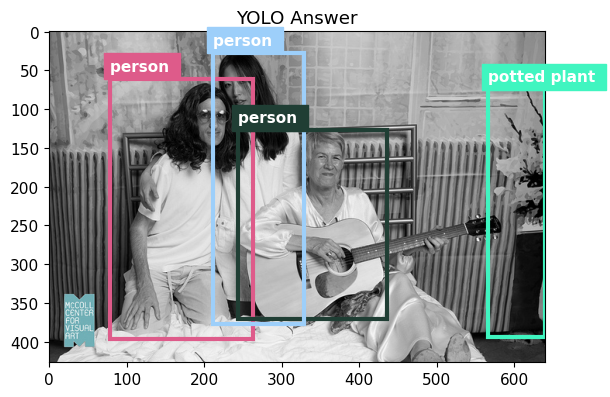

In [15]:
visualize_result("000000342831.jpg")

In [16]:
import numpy as np
import random
%matplotlib inline

def visualize_result(img_path):
    img = plt.imread(img_path)
    result = model(img)
    
    df = result.pandas().xyxy[0]
    object_num = df.shape[0]
    fig,ax = plt.subplots()
    plt.imshow(img)
    plt.title(label="YOLO Answer")
    for i in range(object_num):  
        
        color = (random.random(),random.random(),random.random())
        x = df.iloc[i]['xmin']
        y = df.iloc[i]['ymin']
        x_length = df.iloc[i]['xmax'] - df.iloc[i]['xmin']
        y_length = df.iloc[i]['ymax'] - df.iloc[i]['ymin']
        
        label = df.iloc[i]['name']
        confidence = df.iloc[i]['confidence']
        
        ax.add_patch(plt.Rectangle((x,y), x_length,y_length, fill=False, edgecolor=(color),linewidth=3))
        # ax.text(x, y - 10, f"{label} {round(confidence,2)}", color='white', fontsize=11, weight='bold', backgroundcolor=color)
        ax.text(x, y - 10, f"{label} ", color='white', fontsize=11, weight='bold', backgroundcolor=color)

        
    plt.show()

Random Color, Same Category

In [17]:
def color_seed(rand_seed):
    random.seed(rand_seed)
    return {i:(random.random(),random.random(),random.random())  for i in categories.values()}

Visualize the result

In [18]:
def visualize_image_result(img_path,annotation):
    img = plt.imread(img_path)
    color = color_seed(40)
    
    fig,axes = plt.subplots(1,3,figsize=(20,6))
    
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    axes[1].imshow(img)
    axes[1].set_title("Annotation Image")
    axes[1].axis('off')
    
    for i in annotation:
        x1, y1, x1_length, y1_length = i['bbox']
        label1 = i["category"]
        axes[1].add_patch(plt.Rectangle((x1, y1), x1_length, y1_length, fill=False, edgecolor=color[label1], linewidth=2))
        axes[1].text(x1, y1 - 10, f"{label1}", color='white', fontsize=11, weight='bold', backgroundcolor=color[label1])
        
    axes[2].imshow(img)
    axes[2].set_title("Result")
    axes[2].axis('off')
    
    
    result = model(img)
    df = result.pandas().xyxy[0]
    obj_num = df.shape[0]
    
    for j in range(obj_num):
        
        x = df.iloc[j]['xmin']
        y = df.iloc[j]['ymin']
        x_length = df.iloc[j]['xmax'] - df.iloc[j]['xmin']
        y_length = df.iloc[j]['ymax'] - df.iloc[j]['ymin']
        
        label = df.iloc[j]['name']
        confidence = df.iloc[j]['confidence']
        id2 = df.iloc[j]['class']
        axes[2].add_patch(plt.Rectangle((x, y), x_length, y_length, fill=False, edgecolor=color[label], linewidth=2))
        axes[2].text(x, y - 10, f"{label} {round(confidence, 2)}", color='white', fontsize=11, backgroundcolor=color[label])
    
    plt.tight_layout()
    plt.show()

C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


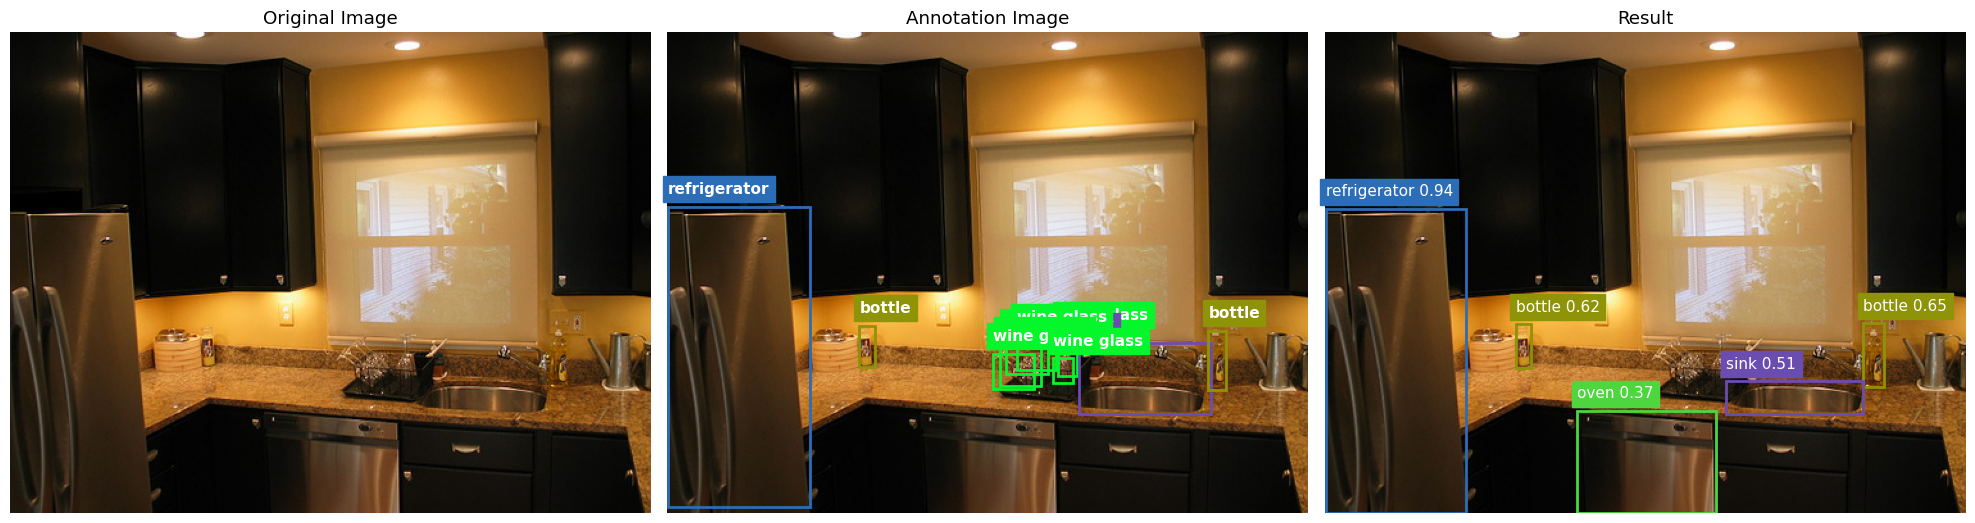

In [19]:
img = "000000333683.jpg"
visualize_image_result(img,test1)

Real Time detection 

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
color = color_seed(49)

while(True):
    ret,frame = cap.read()
    
    cv2.imshow('Real Time capture',frame)
    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    results = model(rgb_frame)
    
    detections = results.pandas().xyxy[0]
    
    for _, row in detections.iterrows():
        x1, y1, x2, y2, conf, cls = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax']), row['confidence'], row['class']
        label = f"{results.names[int(cls)]} {conf:.2f}"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    cv2.imshow('YOLOv5s Real-Time Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\junmi/.cache\torch\hub\ultralytics_yolov5_master\models

In [21]:
x = np.array([[1,2,3]])
h0 = 0
Wx = 0.5
Wh = 0.8
b = 0.2

h1 = np.tanh(Wx*x[0,0] + Wh*h0 + b)
h2 = np.tanh(Wx*x[0,1] + Wh*h1 + b)
h3 = np.tanh(Wx*x[0,2] + Wh*h2 + b)

print(h1)
print(h2)
print(h3)

0.6043677771171634
0.933313521132884
0.9851183017087183
